#Train-Test Split

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
pd.set_option("display.max_rows", None,"display.max_columns", None)
warnings.simplefilter(action='ignore')

%matplotlib inline

In [2]:
df_main = pd.read_csv('/Users/samir/Documents/Data_science_5projects/Project_2/notebook/data/Transform_data.csv')
df_main.head(5)

,Selling_Price,Present_Price,Kms_Driven,Transmission,Owner,Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual
0,3.35,5.59,27000,1,0,6,0,0,1,1,0
1,4.75,9.54,43000,1,0,7,0,1,0,1,0
2,7.25,9.85,6900,1,0,3,0,0,1,1,0
3,2.85,4.15,5200,1,0,9,0,0,1,1,0
4,4.60,6.87,42450,1,0,6,0,1,0,1,0


In [3]:
# Separating target variable and its features
y = df_main['Selling_Price']
X = df_main.drop('Selling_Price',axis=1)


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (216, 10)
x test:  (55, 10)
y train:  (216,)
y test:  (55,)


Model Creation/Evaluation
Applying regression models
Linear Regression
Ridge Regression
Lasso Regression
Random Forest Regression
Gradient Boosting regression

In [5]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [6]:
CV = []
R2_train = []
R2_test = []

def car_pred_model(model,model_name):
    # Training model
    model.fit(X_train,y_train)
            
    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

In [7]:
#Linear Reggresion

In [8]:
from sklearn.preprocessing import StandardScaler
# scaling = StandardScaler()
# scaling.fit_transform(df_main[['selling_price','km_driven','age']])
columns = ['Selling_Price','Kms_Driven','Age','Present_Price']
for i in columns:
    scaling = StandardScaler()
    df_main[i] = scaling.fit_transform(df_main[[i]])

df_main.head(5)

,Selling_Price,Present_Price,Kms_Driven,Transmission,Owner,Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual
0,-0.151324,-0.107181,-0.222947,1,0,-0.026754,0,0,1,1,0
1,0.305055,0.683913,0.564469,1,0,0.399729,0,1,0,1,0
2,1.120017,0.745999,-1.212139,1,0,-1.306201,0,0,1,1,0
3,-0.314317,-0.395580,-1.295802,1,0,1.252694,0,0,1,1,0
4,0.256157,0.149173,0.537402,1,0,-0.026754,0,1,0,1,0


Train R2-score : 0.87
Test R2-score : 0.85
Train CV scores : [0.83861229 0.91854063 0.854498   0.86056357 0.76482873]
Train CV mean : 0.85


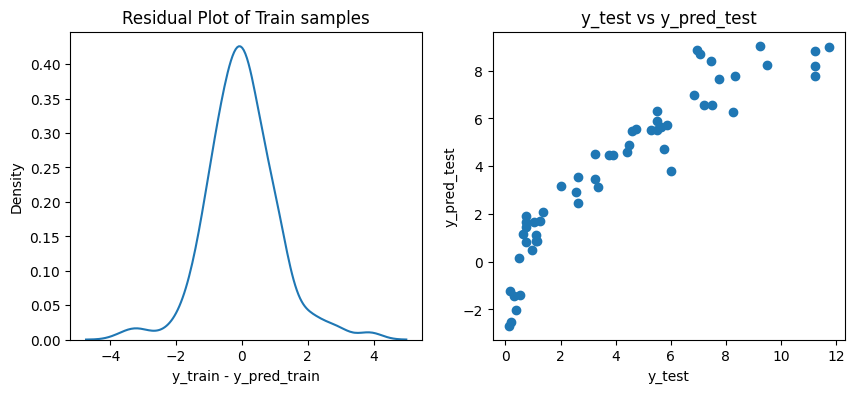

In [9]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
car_pred_model(lr,"Linear_regressor.pkl")

Train R2-score : 0.87
Test R2-score : 0.85
Train CV scores : [0.83158962 0.92112951 0.85471689 0.85993431 0.7647779 ]
Train CV mean : 0.85


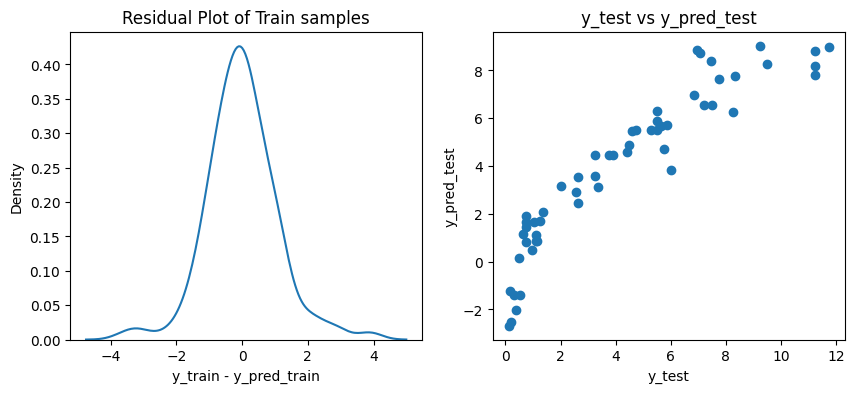

In [10]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

# Creating Ridge model object
rg = Ridge()
# range of alpha 
alpha = np.logspace(-3,3,num=14)

# Creating RandomizedSearchCV to find the best estimator of hyperparameter
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha=alpha))

car_pred_model(rg_rs,"ridge.pkl")

Train R2-score : 0.87
Test R2-score : 0.85
Train CV scores : [0.83713103 0.92281202 0.85609113 0.85839235 0.76454729]
Train CV mean : 0.85


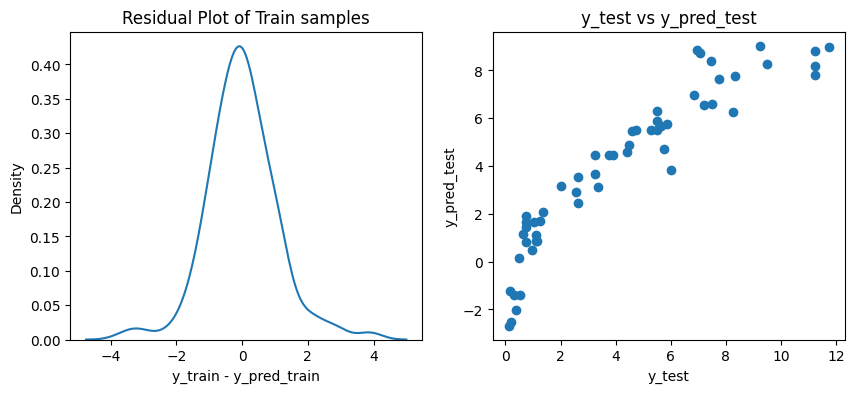

In [11]:
#lasso
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

ls = Lasso()
alpha = np.logspace(-3,3,num=14) # range for alpha

ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha))
car_pred_model(ls_rs,"lasso.pkl")

In [12]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)

Train R2-score : 0.96
Test R2-score : 0.89
Train CV scores : [0.87464356 0.9439244  0.91035655 0.9293862  0.87253836]
Train CV mean : 0.91


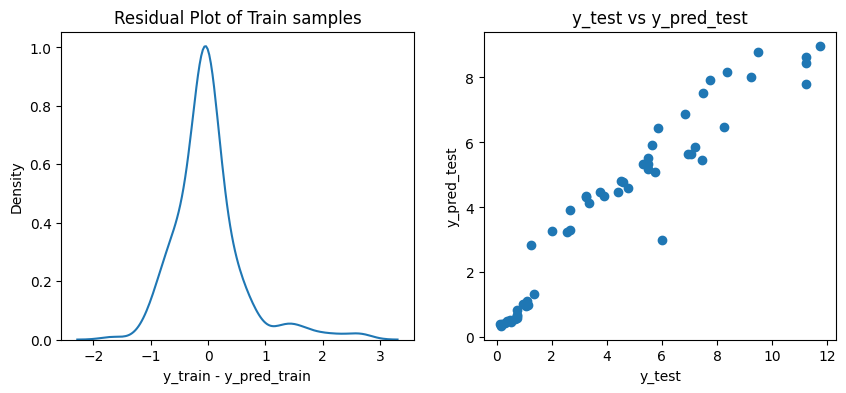

In [13]:
car_pred_model(rf_rs,'random_forest.pkl')

In [14]:
print(rf_rs.best_estimator_)

RandomForestRegressor(max_depth=8, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=4, n_estimators=600)


In [15]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

gb = GradientBoostingRegressor()

# Rate at which correcting is being made
learning_rate = [0.001, 0.01, 0.1, 0.2]
# Number of trees in Gradient boosting
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"learning_rate":learning_rate,
              "n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

gb_rs = RandomizedSearchCV(estimator = gb, param_distributions = param_grid)

Train R2-score : 1.0
Test R2-score : 0.94
Train CV scores : [0.89892062 0.96995828 0.95332504 0.96934965 0.8807586 ]
Train CV mean : 0.93


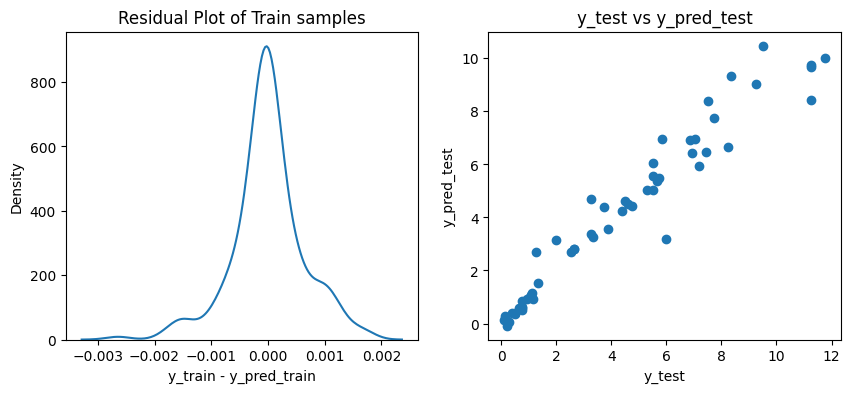

In [16]:
car_pred_model(gb_rs,"gradient_boosting.pkl")

In [17]:
Technique = ["LinearRegression","Ridge","Lasso","RandomForestRegressor","GradientBoostingRegressor"]
results=pd.DataFrame({'Model': Technique,'R Squared(Train)': R2_train,'R Squared(Test)': R2_test,'CV score mean(Train)': CV})
display(results)

,Model,R Squared(Train),R Squared(Test),CV score mean(Train)
0,LinearRegression,0.87,0.85,0.85
1,Ridge,0.87,0.85,0.85
2,Lasso,0.87,0.85,0.85
3,RandomForestRegressor,0.96,0.89,0.91
4,GradientBoostingRegressor,1.00,0.94,0.93
